In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.sample(35)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
36,IND,India,Askandra - Newton Solar Power Plant,WRI1026110,5.00,27.3537,71.6917,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,IND,India,PATHADI TPS PH -I,IND0000330,600.00,22.2454,82.7246,Coal,Oil,NaN,...,2019.0,NaN,2042.34000,2702.500000,4076.980000,3805.59000,3942.92000,NaN,Central Electricity Authority,NaN
342,IND,India,KHATIMA,IND0000196,41.40,28.9232,80.0243,Hydro,NaN,NaN,...,2019.0,NaN,44.95410,119.847750,179.239300,211.53700,231.08875,NaN,Central Electricity Authority,NaN
407,IND,India,Khirwa Solar Power Plant,WRI1026164,1.00,27.3010,72.3236,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,IND,India,Dhursar,WRI1020240,125.00,26.7846,72.0083,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,IND,India,HZL Nandurbar Maharashtra,WRI1026080,25.50,21.3027,74.3091,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,IND,India,MAHADEV PRASAD STPP,IND0000246,540.00,22.8395,86.0613,Coal,Oil,NaN,...,2019.0,NaN,1999.65000,2663.470000,2975.660000,2662.47000,2657.13200,NaN,Central Electricity Authority,NaN
462,IND,India,MANI DPH,IND0000256,9.00,13.6763,75.0462,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,IND,India,HZL Palladum Wind Farm,WRI1026656,21.00,10.8674,77.4588,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,IND,India,BINA TPP,IND0000059,500.00,23.3172,78.1336,Coal,Oil,NaN,...,2019.0,NaN,2236.99080,1204.067500,739.155400,2265.47000,2299.63000,NaN,Central Electricity Authority,NaN


In [36]:
# first lets remove all the irrelavant columns but beofre that lets check for the null values

data.info()
print(data['source'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

based on the above information we will delete following columns:


    Country and country_long = this data contains only 1 country so its irrelavant for this model
    name = irrelevant column
    gppd_idnr = irrelevant column
    other fuel1, fuel2 and fuel3 = lots of missing values
    wepp id = irrelevant and missing values
    url = not relevant for modeling
    generation_gwh_2013 and 2019= missing values
    generation_data_source = only one source throughout the database
    year_of_capacity_data = only one year throughout the database
    estimated_generation_gwh = missing values
    owner = irrelevant colum

In [37]:
data = data.drop(columns=['country','country_long','name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3',
                  'owner','source','url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019',
                  'generation_data_source','estimated_generation_gwh'])
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

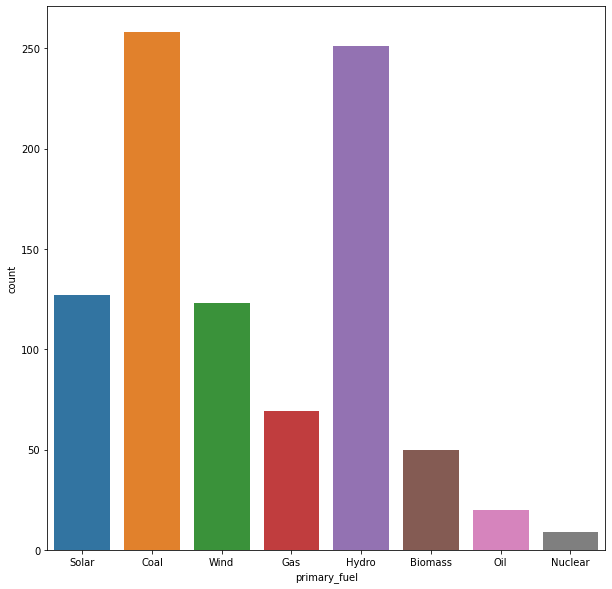

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['primary_fuel'])

From the above graph, we can say that coal and hydro are the dominant fuel in indian power plant industry, and they we still have scope in solar, oil and Nuclear in terms of primary fuel

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

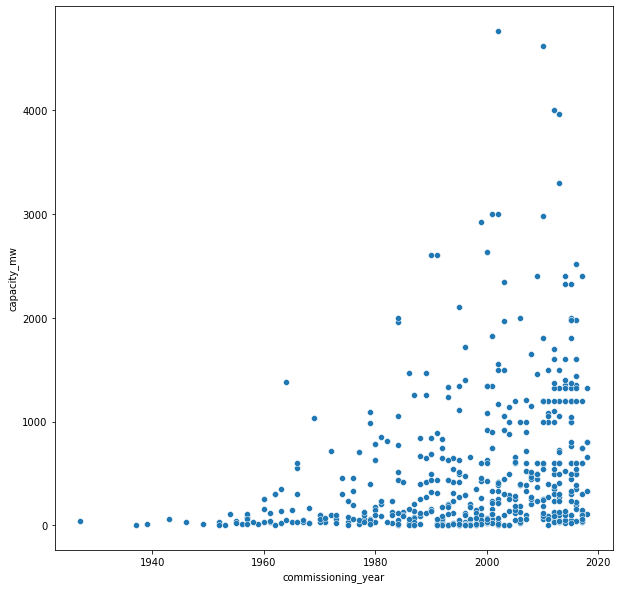

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['commissioning_year'],y=data['capacity_mw'],data=data)

here we see an interesting trend,

    most of the power plant are established after 1980,
    and we have also seen that all the new power plants have have more capacity as compared to the old power plants 

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

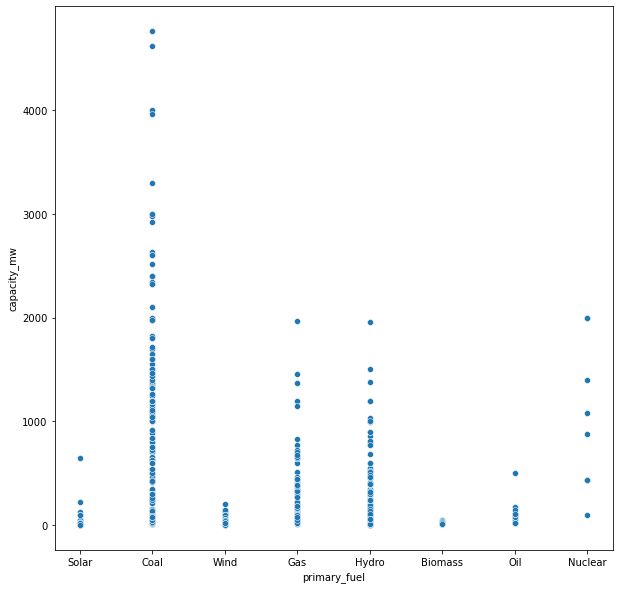

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['primary_fuel'],y=data['capacity_mw'],data=data)

when we compare primary fuel with the capacity we can see that although solar and wind contributes signifincantly in terms of number of power plants in the country, however when we check the capcity of these two fuel we can say that the maximum capacity if the plant of these two fuels are even less than 500 mw

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2018'>

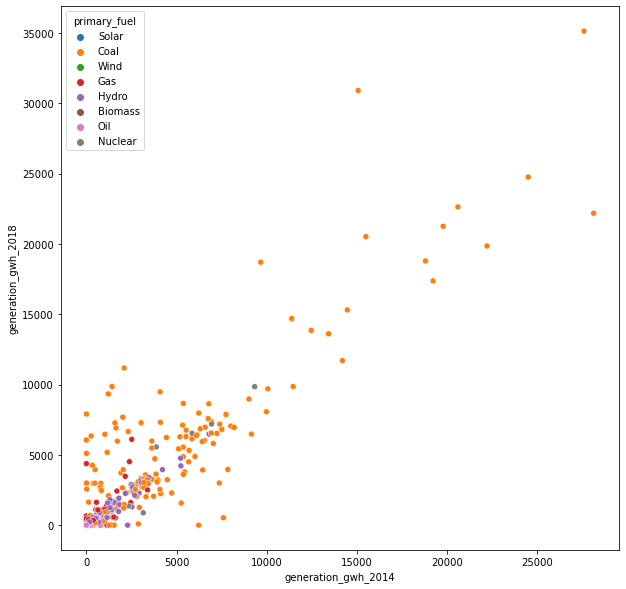

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['generation_gwh_2014'],y=data['generation_gwh_2018'],hue=data['primary_fuel'],data=data)

when we see the plant productivity over time we chan see the positive correlation between the power generation and year it means that the plant have increased the productivity and generates more power over time, lets check the productivity over time based on the primary fuel

# Data Preprocessing

In [43]:
data.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [44]:
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018'] = data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())
data['commissioning_year'] = data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])



In [45]:
data = data.dropna()
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,2015.0,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,2015.0,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2015.0,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,2015.0,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,2015.0,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [46]:
data.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

we have successfully treated the null values

In [47]:
# now lets encode the categorical columns
from sklearn.preprocessing import LabelEncoder

data['primary_fuel'] = LabelEncoder().fit_transform(data['primary_fuel'])
data['geolocation_source'] = LabelEncoder().fit_transform(data['geolocation_source'])

In [48]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2015.0,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


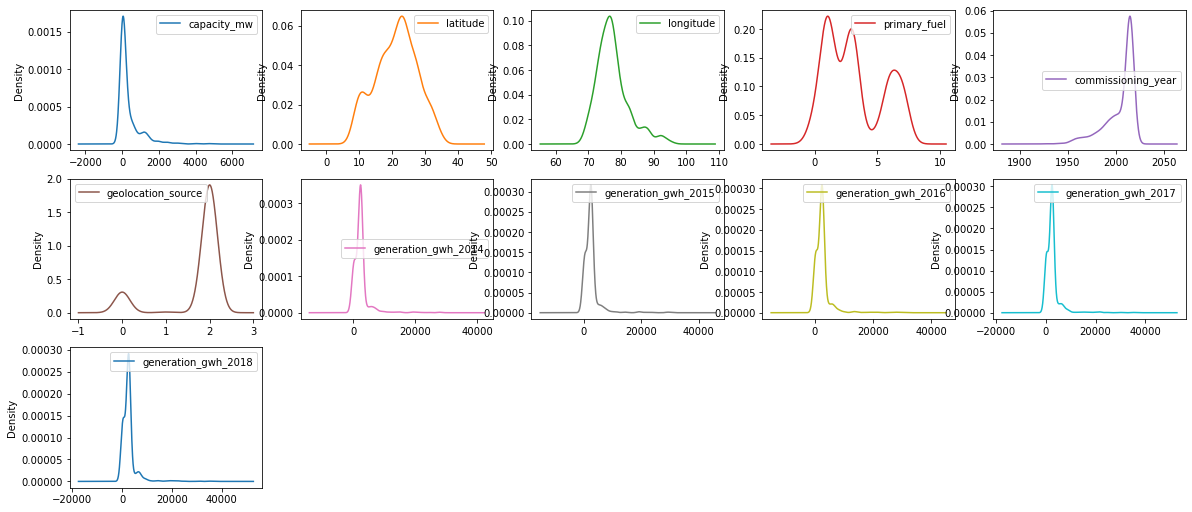

geolocation_source    -2.072165
commissioning_year    -1.683585
latitude              -0.145866
primary_fuel           0.507576
longitude              1.112646
capacity_mw            3.037191
generation_gwh_2018    4.843057
generation_gwh_2014    4.930254
generation_gwh_2016    4.965294
generation_gwh_2017    5.014455
generation_gwh_2015    5.253370
dtype: float64

In [49]:
data.plot(kind='density',subplots=True,sharex=False,layout=(5,5),figsize=(20,15))
plt.show()

data.skew().sort_values(ascending=True)

it seems that all the contineous data apart from latitiude has been highly skewed

<AxesSubplot:>

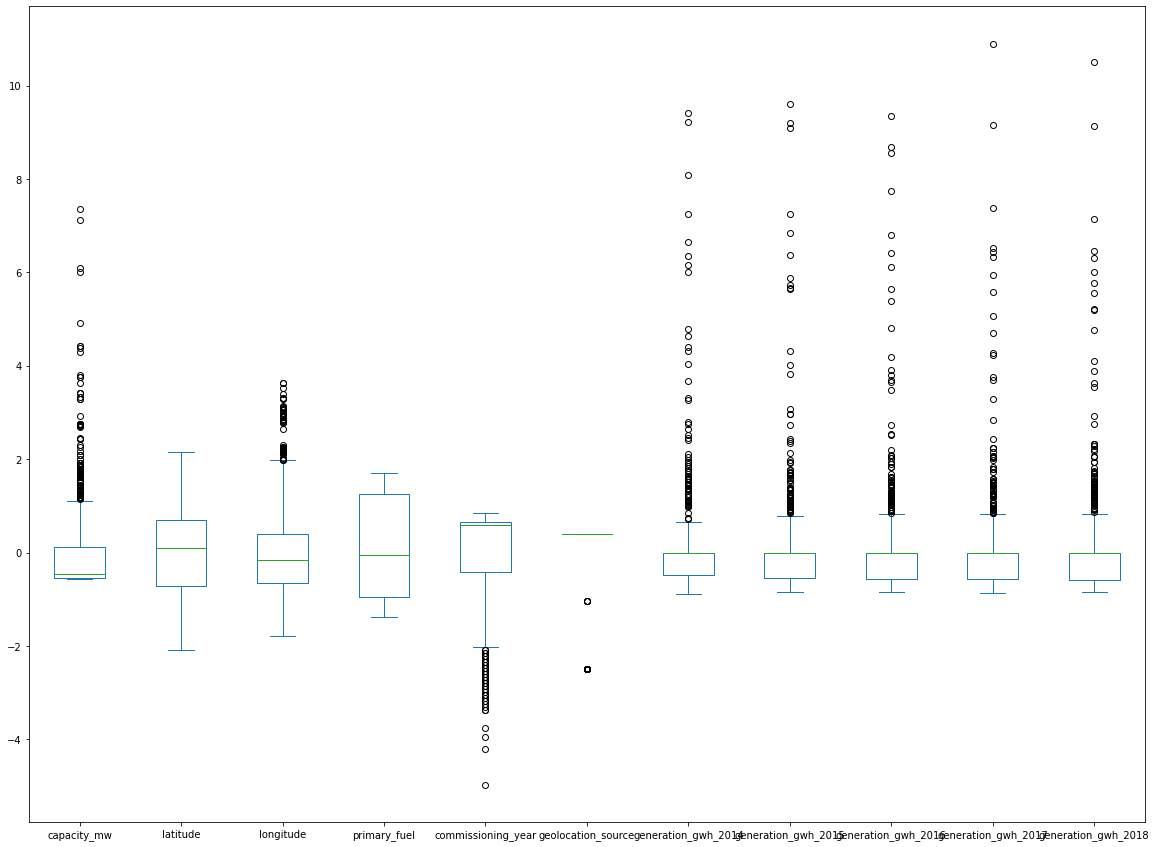

In [50]:
# lets check for the ouliers
from scipy.stats import zscore

zscore(data).plot(kind='box',figsize=(20,15))

In [65]:
# except laltiude all the contieous column have outlier so lets remove those before treating the skewed data
outlerlist = ['capacity_mw','longitude','commissioning_year']

# we will use zscore to remove the outlier from the data

z_score= np.abs(zscore(data[outlerlist]))

data = data[(z_score<3).all(axis=1)]
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
5,250.0,23.7689,68.6447,1,2005.0,2,1153.42100,1208.852000,1175.765000,1147.913000,976.655000
7,192.0,32.2258,77.2070,3,2010.0,2,674.39110,721.335200,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,5,1993.0,2,0.00000,0.000000,0.000000,2547.759305,0.000000
903,3.0,12.8932,78.1654,6,2015.0,0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


<AxesSubplot:>

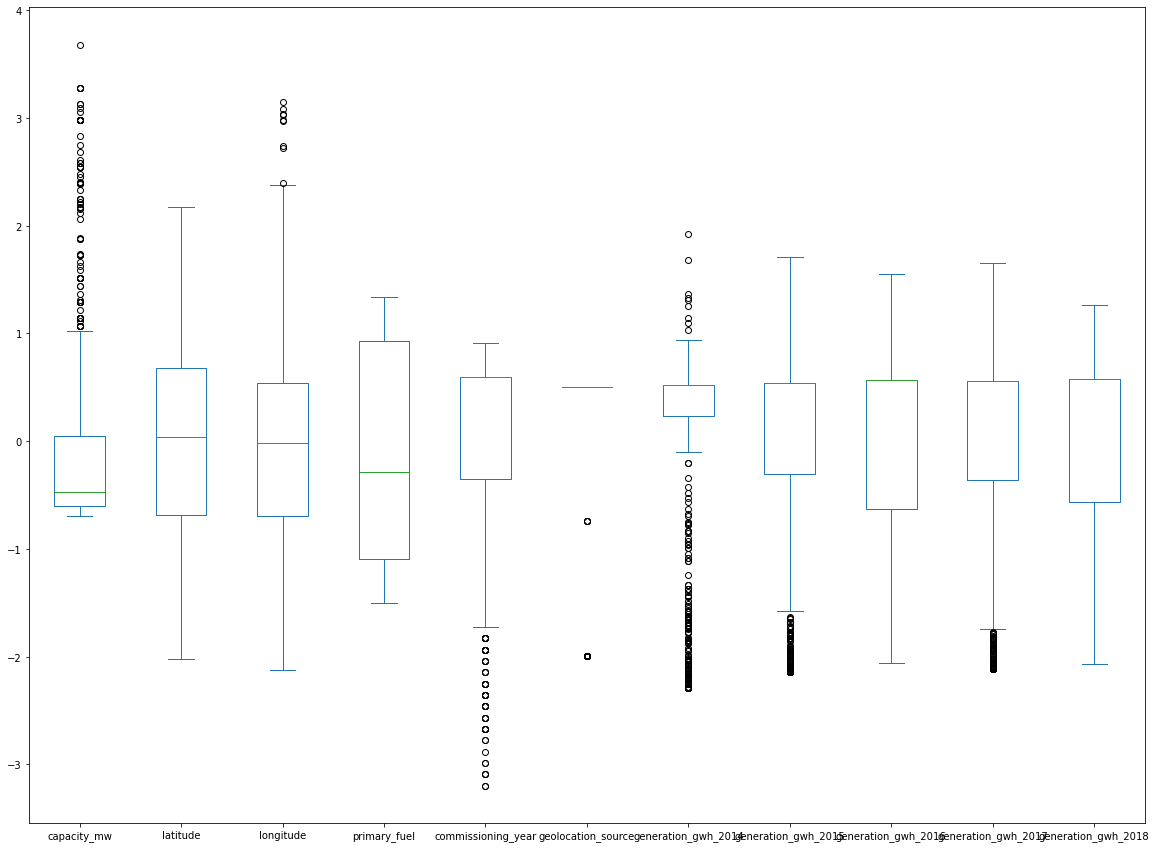

In [66]:
# lets check for the ouliers
from scipy.stats import zscore

zscore(data).plot(kind='box',figsize=(20,15))

<AxesSubplot:>

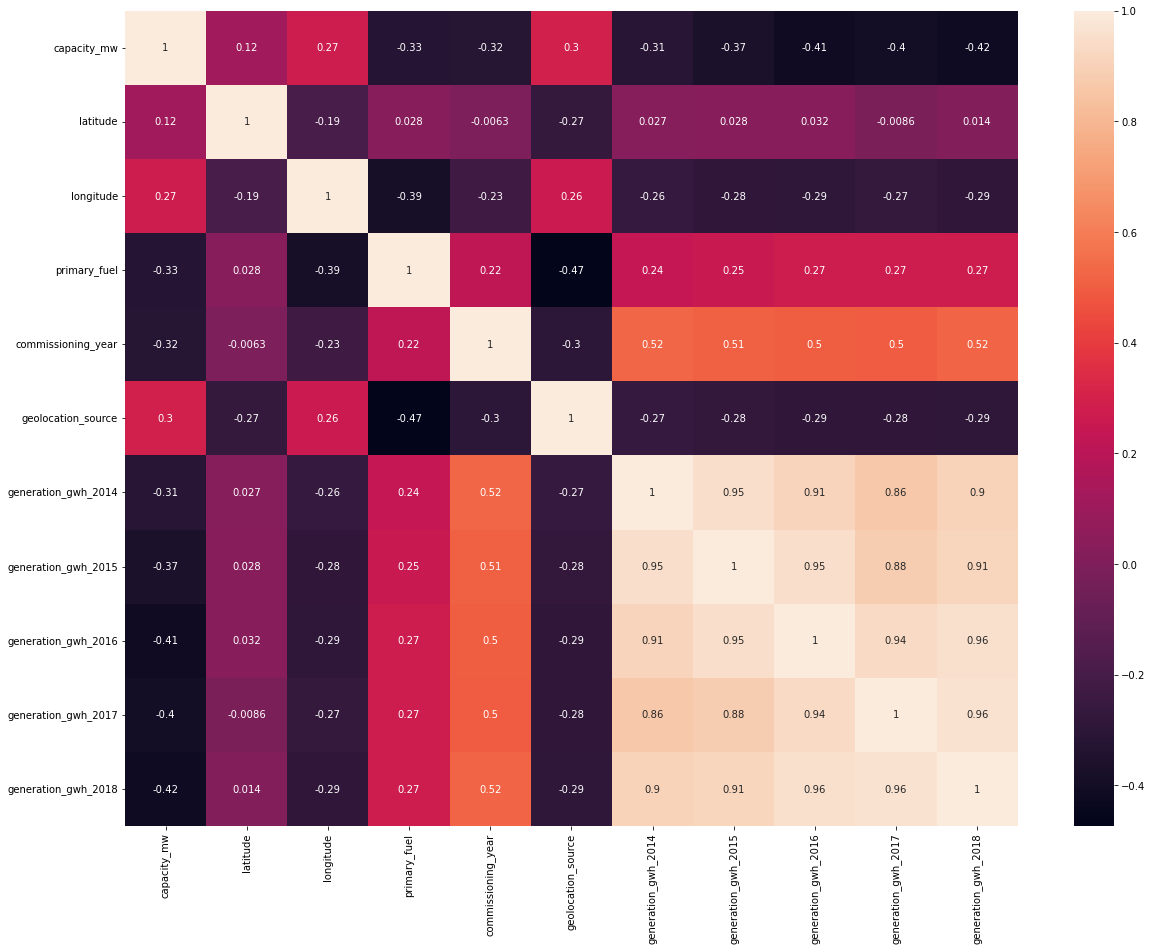

In [67]:
# check for the multicolinearity problem
# now lets check if there is multicolinearity between the features

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

generation_gwh_2017	and generation_gwh_2018 are highly corelated so we will delete 2017 data to prevent multicolinearity problem

In [68]:
data = data.drop(columns='generation_gwh_2017')
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,2431.82359,2428.226946,2467.936859,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,2,2431.82359,2428.226946,2467.936859,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,2,2431.82359,2428.226946,2467.936859,2600.804099
5,250.0,23.7689,68.6447,1,2005.0,2,1153.42100,1208.852000,1175.765000,976.655000
7,192.0,32.2258,77.2070,3,2010.0,2,674.39110,721.335200,675.724400,579.318850
...,...,...,...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,5,1993.0,2,0.00000,0.000000,0.000000,0.000000
903,3.0,12.8932,78.1654,6,2015.0,0,2431.82359,2428.226946,2467.936859,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,2,2431.82359,2428.226946,2467.936859,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,2,2431.82359,2428.226946,2467.936859,2600.804099


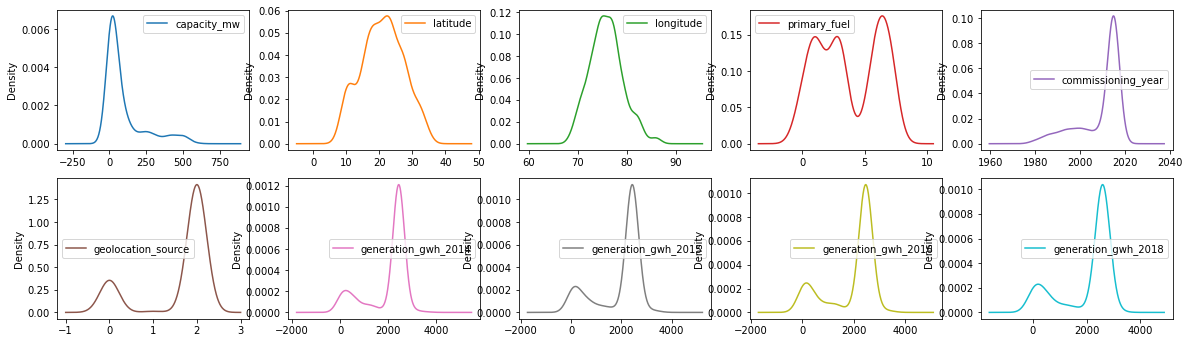

commissioning_year    -1.522820
geolocation_source    -1.482446
generation_gwh_2014   -1.359116
generation_gwh_2015   -1.261787
generation_gwh_2018   -1.216353
generation_gwh_2016   -1.186412
latitude              -0.009208
primary_fuel           0.045250
longitude              0.385963
capacity_mw            1.875369
dtype: float64

In [69]:
data.plot(kind='density',subplots=True,sharex=False,layout=(5,5),figsize=(20,15))
plt.show()

data.skew().sort_values(ascending=True)

<AxesSubplot:>

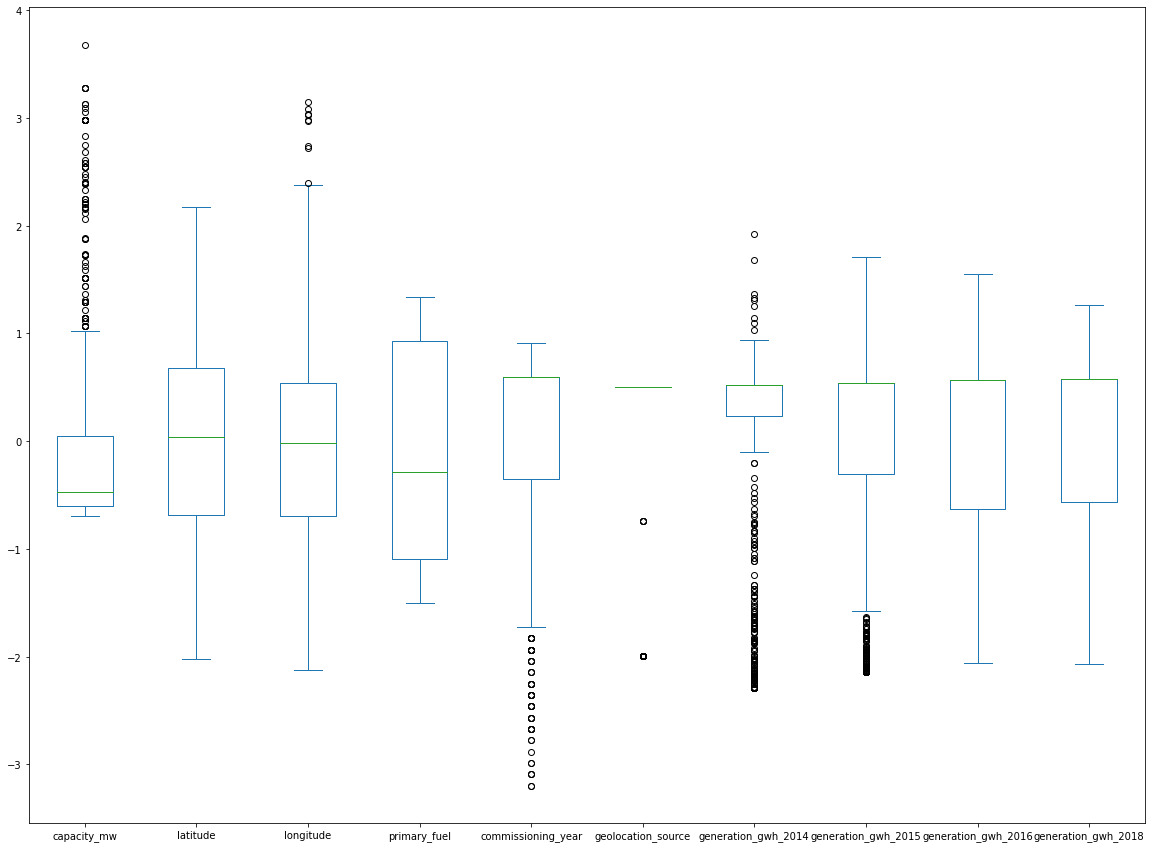

In [71]:
# lets check for the ouliers
from scipy.stats import zscore

zscore(data).plot(kind='box',figsize=(20,15))

# Classification Problem

## Splitting the data

In [184]:
# spliting the data into label and features
X = data.drop(columns='primary_fuel')
y = data['primary_fuel']

X.sample(15)

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
153,5.000,20.0209,79.2712,2015.0,0,2431.82359,2428.226946,2467.936859,2600.804099
95,99.000,24.2508,78.1606,2015.0,2,2431.82359,2428.226946,2467.936859,2600.804099
616,15.200,23.9151,71.9424,2015.0,0,2431.82359,2428.226946,2467.936859,2600.804099
464,50.000,19.7235,79.1761,2015.0,2,2431.82359,2428.226946,2467.936859,2600.804099
235,540.000,31.3841,75.1464,2016.0,2,2431.82359,117.654000,197.872000,2211.670000
650,94.800,28.7327,77.1016,2010.0,2,0.00000,0.000000,0.000000,0.000000
210,431.586,28.3452,77.3615,1999.0,2,1527.00000,1068.000000,1004.908000,578.000000
174,330.000,26.7024,77.8492,2007.0,2,829.11420,282.700000,94.855000,20.234900
813,500.000,19.0004,72.8983,1990.0,2,770.18000,15.000000,0.000000,0.000000
892,16.000,17.1401,73.8660,1998.0,2,2431.82359,2428.226946,2467.936859,2600.804099


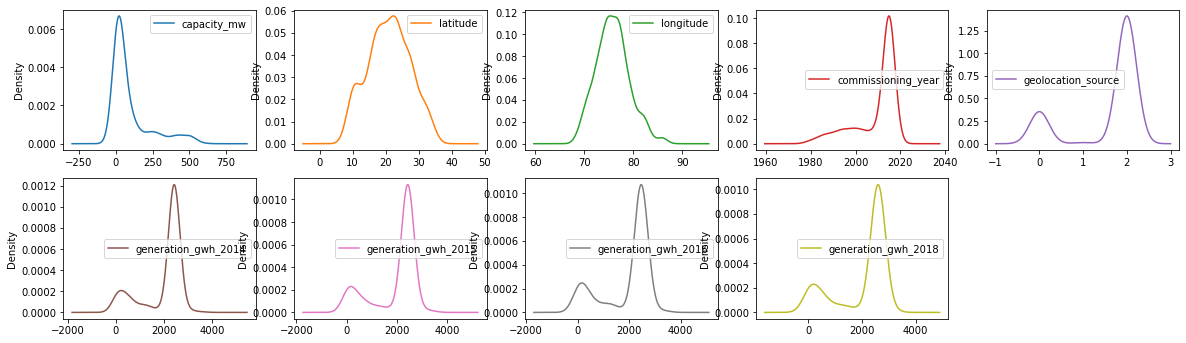

commissioning_year    -1.522820
geolocation_source    -1.482446
generation_gwh_2014   -1.359116
generation_gwh_2015   -1.261787
generation_gwh_2018   -1.216353
generation_gwh_2016   -1.186412
latitude              -0.009208
longitude              0.385963
capacity_mw            1.875369
dtype: float64

In [185]:
X.plot(kind='density',subplots=True,sharex=False,layout=(5,5),figsize=(20,15))
plt.show()

X.skew().sort_values(ascending=True)

In [186]:
# removing skewness
X['capacity_mw'] = np.cbrt(X['capacity_mw'])
X['longitude'] = np.sqrt(X['longitude'])
X['commissioning_year'] = np.power(X['commissioning_year'],5)

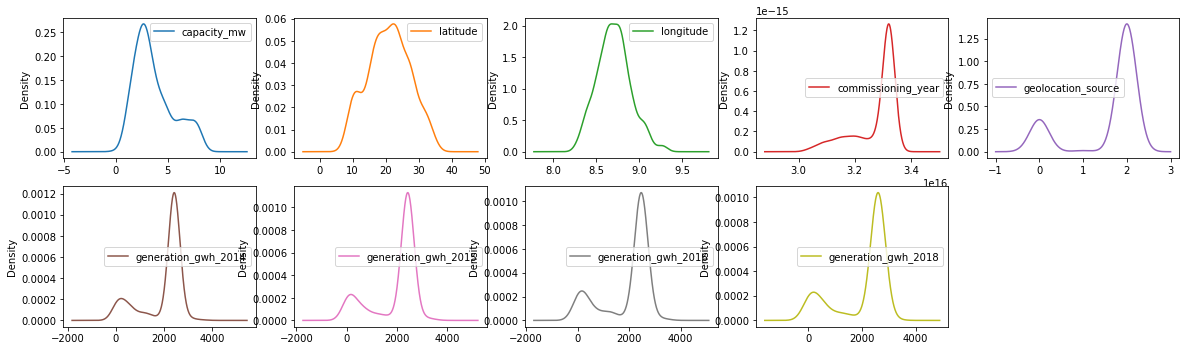

commissioning_year    -1.502560
geolocation_source    -1.482446
generation_gwh_2014   -1.359116
generation_gwh_2015   -1.261787
generation_gwh_2018   -1.216353
generation_gwh_2016   -1.186412
latitude              -0.009208
longitude              0.320285
capacity_mw            0.812736
dtype: float64

In [187]:
X.plot(kind='density',subplots=True,sharex=False,layout=(5,5),figsize=(20,15))
plt.show()

X.skew().sort_values(ascending=True)

In [137]:
# after applying we are not able to remove the skewness, so we will go ahead with the regular data


# Scaling the data

In [188]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[-1.21615027,  1.15196058, -0.76481181, ...,  0.5432657 ,
         0.56929264,  0.58071159],
       [ 0.49863265,  0.61039581, -0.35309599, ...,  0.5432657 ,
         0.56929264,  0.58071159],
       [-0.14097291,  0.15679411, -1.94979211, ...,  0.5432657 ,
         0.56929264,  0.58071159],
       ...,
       [-0.38007476, -0.89350181, -0.06288466, ...,  0.5432657 ,
         0.56929264,  0.58071159],
       [ 0.33967611,  0.54442746, -0.61181271, ...,  0.5432657 ,
         0.56929264,  0.58071159],
       [-0.58962997, -1.73991862,  0.49773958, ...,  0.5432657 ,
         0.56929264,  0.58071159]])

# Training the model

All the preprocessing of the data has been done, now we will train the model

I will be using follwoing model for prediction:
    
    Logisitics Regression
    DecsionTree
    Random Forest
    Knn

###### Identifying best random state for logisitics regression

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.717948717948718 random state - 0
Accurancy Score -  0.7435897435897436 random state - 4
Accurancy Score -  0.8290598290598291 random state - 43


###### Confusion matrix and clssification report - Logistics Regression

In [190]:
#the random state from logisitics regression is 43, so we will use to generate confusion matrix and classification report
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=43)
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = lm.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 82.90598290598291 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.83      0.83      0.83        23
           2       0.71      1.00      0.83         5
           3       0.93      0.89      0.91        28
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        26
           7       0.65      1.00      0.79        22

    accuracy                           0.83       117
   macro avg       0.59      0.67      0.62       117
weighted avg       0.76      0.83      0.79       117

[[ 0  3  0  0  0  0  8]
 [ 0 19  0  1  0  0  3]
 [ 0  0  5  0  0  0  0]
 [ 0  1  2 25  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0 22]]


###### Identifying best random state for Decision Tree

In [191]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8290598290598291 random state - 0
Accurancy Score -  0.8547008547008547 random state - 43


###### Confusion matrix and clssification report - Decision Tree

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=43)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = dt.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 85.47008547008546 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.80      0.70      0.74        23
           2       0.67      0.80      0.73         5
           3       0.90      0.96      0.93        28
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        26
           7       0.79      0.86      0.83        22

    accuracy                           0.85       117
   macro avg       0.72      0.72      0.72       117
weighted avg       0.86      0.85      0.85       117

[[ 8  1  0  0  0  0  2]
 [ 0 16  1  2  1  0  3]
 [ 0  1  4  0  0  0  0]
 [ 0  0  0 27  1  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  0  0 26  0]
 [ 1  2  0  0  0  0 19]]


###### Identifying best random state for KNN

In [194]:
# best the best random state for Logistic regrssion model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7948717948717948 random state - 0
Accurancy Score -  0.8461538461538461 random state - 2


###### Confusion matrix and clssification report - KNN

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=2)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = knn.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 84.61538461538461 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.81      0.79      0.80        28
           2       0.60      0.38      0.46         8
           3       0.83      0.95      0.89        21
           5       0.33      1.00      0.50         1
           6       1.00      0.97      0.98        30
           7       0.94      0.85      0.89        20

    accuracy                           0.85       117
   macro avg       0.74      0.82      0.75       117
weighted avg       0.86      0.85      0.85       117

[[ 7  1  0  0  0  0  1]
 [ 3 22  2  1  0  0  0]
 [ 0  0  3  3  2  0  0]
 [ 0  1  0 20  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  1  0  0  0 29  0]
 [ 1  2  0  0  0  0 17]]


###### Identifying best random state for Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.811965811965812 random state - 0
Accurancy Score -  0.8547008547008547 random state - 1
Accurancy Score -  0.8803418803418803 random state - 10
Accurancy Score -  0.8888888888888888 random state - 48
Accurancy Score -  0.905982905982906 random state - 54


###### Confusion matrix and clssification report - Random Forest

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=54)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 91.45299145299145 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.86      0.86      0.86        22
           2       0.62      0.83      0.71         6
           3       0.97      0.97      0.97        32
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00        24
           7       0.95      0.95      0.95        21

    accuracy                           0.91       117
   macro avg       0.87      0.85      0.85       117
weighted avg       0.92      0.91      0.91       117

[[ 5  1  0  0  0  0  0]
 [ 1 19  0  1  0  0  1]
 [ 0  1  5  0  0  0  0]
 [ 0  1  0 31  0  0  0]
 [ 0  0  3  0  3  0  0]
 [ 0  0  0  0  0 24  0]
 [ 1  0  0  0  0  0 20]]


##### Hyper Parameter tuning

In [203]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'min_samples_split': range(1,5),'max_depth':range(1,5),'random_state': range(1,5)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 3}


In [207]:
ri = 0
acc = 0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=54)
    rf = RandomForestClassifier(criterion='entropy', max_depth=55, min_samples_leaf=1,min_samples_split=2,random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_pred,y_test)

    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.905982905982906 random state - 1
Accurancy Score -  0.9145299145299145 random state - 9
Accurancy Score -  0.9230769230769231 random state - 17
Accurancy Score -  0.9316239316239316 random state - 84


We have abeen able to improve the result by around 2% with new parameters and random state 84 so we will go ahead and use the new parameter

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=54)
rf = RandomForestClassifier(criterion='entropy', max_depth=55, min_samples_leaf=1,min_samples_split=2,random_state=84)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 93.16239316239316 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.88      0.95      0.91        22
           2       0.62      0.83      0.71         6
           3       1.00      0.94      0.97        32
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00        24
           7       0.95      0.95      0.95        21

    accuracy                           0.93       117
   macro avg       0.90      0.88      0.88       117
weighted avg       0.94      0.93      0.93       117

[[ 6  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  1]
 [ 0  1  5  0  0  0  0]
 [ 0  2  0 30  0  0  0]
 [ 0  0  3  0  3  0  0]
 [ 0  0  0  0  0 24  0]
 [ 1  0  0  0  0  0 20]]


##### Saving the best Model - Random Forest

In [209]:
import pickle

filename = 'final_model.pkl'
pickle.dump(rf, open('rf.pkl', 'wb'))